In [1]:
import pandas as pd
import numpy as np
import yfinance as yf


In [2]:
EMPRESA = 'WEGE3.SA'

df = yf.download(EMPRESA, period='2y')


[*********************100%%**********************]  1 of 1 completed


In [3]:
df_filtrado = df[['Close']]
df_filtrado['diff'] = df_filtrado.diff(1)

C:\Users\teixe\AppData\Local\Temp\ipykernel_11140\3725525523.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['diff'] = df_filtrado.diff(1)


In [4]:
# Dias para calcular Índice de Força Relativa
PERIODO = 14

df_filtrado['ganho'] = df_filtrado['diff'].clip(lower=0).round(2)
df_filtrado['perda'] = df_filtrado['diff'].clip(upper=0).abs().round(2)

C:\Users\teixe\AppData\Local\Temp\ipykernel_11140\2823809761.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['ganho'] = df_filtrado['diff'].clip(lower=0).round(2)
C:\Users\teixe\AppData\Local\Temp\ipykernel_11140\2823809761.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['perda'] = df_filtrado['diff'].clip(upper=0).abs().round(2)


In [5]:
# Calcular média movel simples da primeira ocorrencia
df_filtrado['mm_ganho'] = df_filtrado['ganho'].rolling(window=PERIODO, min_periods=PERIODO).mean()[:PERIODO+1]
df_filtrado['mm_perda'] = df_filtrado['perda'].rolling(window=PERIODO, min_periods=PERIODO).mean()[:PERIODO+1]

C:\Users\teixe\AppData\Local\Temp\ipykernel_11140\1730872273.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['mm_ganho'] = df_filtrado['ganho'].rolling(window=PERIODO, min_periods=PERIODO).mean()[:PERIODO+1]


In [6]:
for i in range(15,len(df_filtrado)):
    df_filtrado.mm_ganho[i] = (df_filtrado.mm_ganho[i-1] * (PERIODO-1) + df_filtrado.ganho[i]) / PERIODO
    df_filtrado.mm_perda[i] = (df_filtrado.mm_perda[i-1] * (PERIODO-1) + df_filtrado.perda[i]) / PERIODO

In [7]:
#Calculo IFR
df_filtrado['irf'] = 100 - (100 / (1+(df_filtrado.mm_ganho/df_filtrado.mm_perda)))

Text(0.5, 1.0, 'Índice de força relativa')

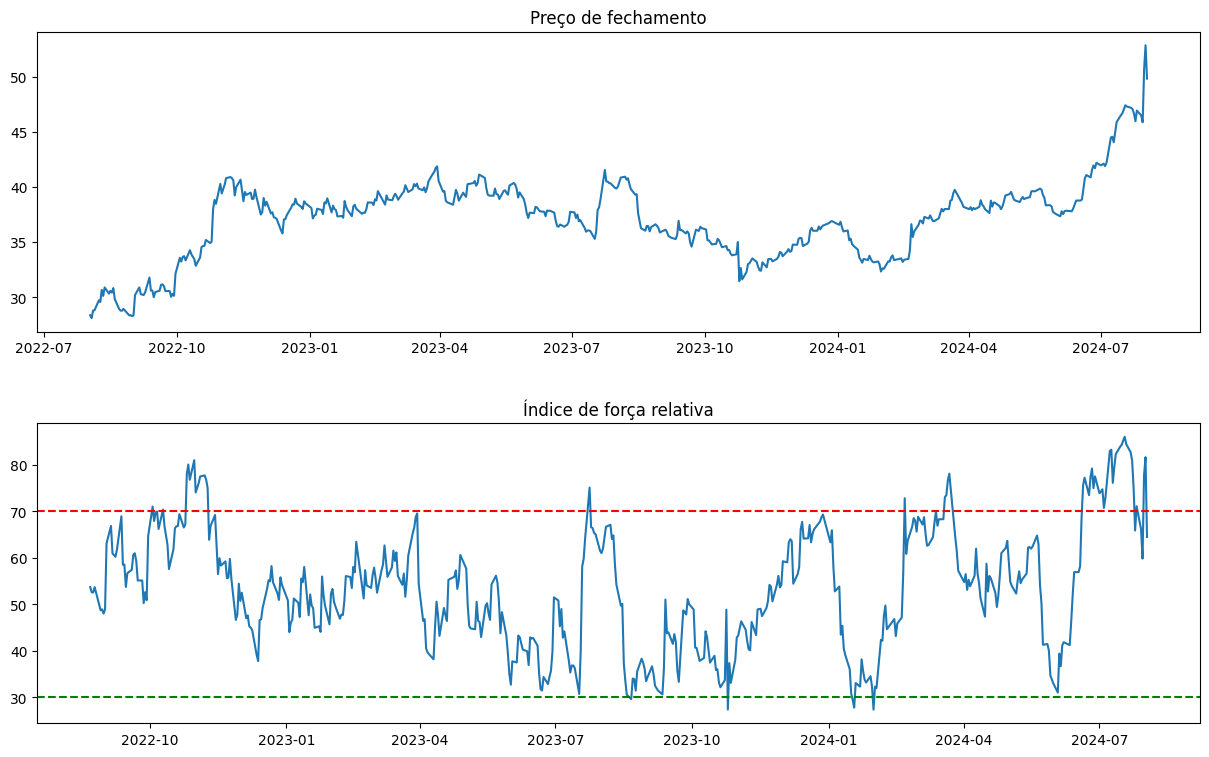

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))

ax1 = plt.subplot2grid((10,1),(0,0), rowspan=4, colspan=1)
ax2 = plt.subplot2grid((10,1),(5,0), rowspan=4, colspan=1)
ax1.plot(df_filtrado['Close'])
ax1.set_title('Preço de fechamento')

ax2.plot(df_filtrado['irf'])
ax2.axhline(70, linestyle='--', linewidth=1.5, color='red')
ax2.axhline(30, linestyle='--', linewidth=1.5, color='green')
ax2.set_title('Índice de força relativa')